In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
cd ..

/home/jovyan/UCLA_CSX_450_2_2018_W/10-ames-iowa-3


In [3]:
%run src/load_data.py

In [4]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[1437 rows x 80 columns]
listing_df                   DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_df                   DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
numeric_final_df             DataFrame          LotFrontage   LotAr<...>n[1437 rows x 23 columns]
numeric_log_df               DataFrame          LotFrontage    LotA<...>n[1451 rows x 23 columns]
numeric_log_sc_df            DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
numeric_sc_df                DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
sale_df                      DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df     

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(numeric_final_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

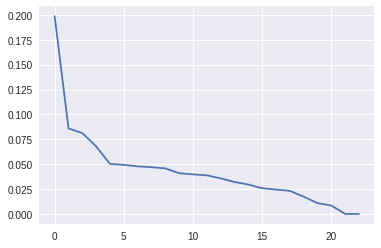

In [6]:
plt.plot(pca.explained_variance_ratio_)

In [7]:
pca = PCA(4)
pca.fit(numeric_final_df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

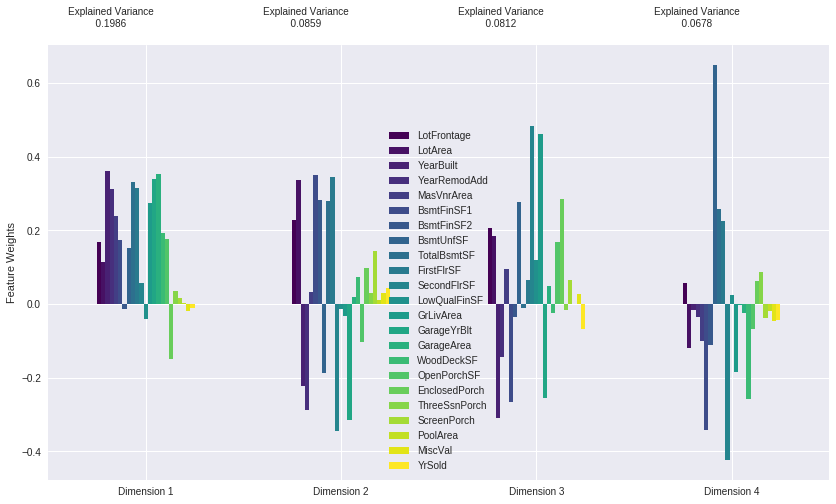

In [8]:
import lib.viz_helper as viz
pca_df = viz.pca_results(numeric_final_df, pca)

In [ ]:
housing_ouliers_removed_df.MSSubClass

In [9]:
numeric_pca = pca.transform(numeric_final_df)

In [10]:
numeric_pca.shape

(1437, 4)

In [15]:
numeric_pca_df = pd.DataFrame(numeric_pca)

In [11]:
unique_classes = housing_ouliers_removed_df.MSSubClass.unique()
unique_classes

[60, 20, 70, 50, 190, ..., 80, 160, 75, 180, 40]
Length: 15
Categories (15, int64): [60, 20, 70, 50, ..., 160, 75, 180, 40]

In [13]:
ms_mask = housing_outliers_removed_df.MSSubClass == unique_classes[0]

In [17]:
filtered_indices = numeric_pca_df.index[ms_mask]

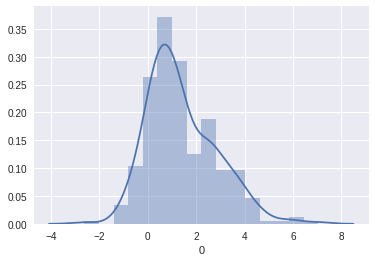

In [19]:
sns.distplot(numeric_pca_df.iloc[filtered_indices][0])

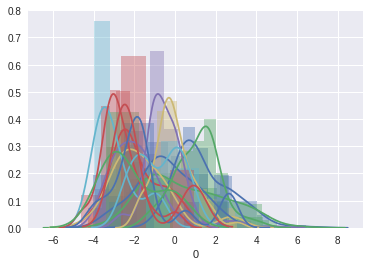

In [23]:
def plot_pc_dist_by_cat_feat(pc, cat):
    cat_feature = housing_ouliers_removed_df[cat]
    for subcat in cat_feature.unique():
        tmp_mask = cat_feature == subcat
        filtered_indices = numeric_pca_df.index[tmp_mask]
        tmp_df = numeric_pca_df.iloc[filtered_indices]
        sns.distplot(tmp_df[pc])

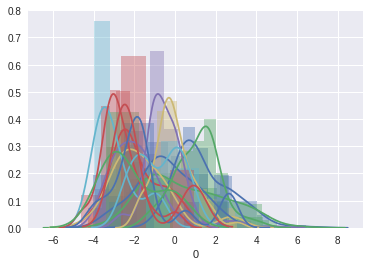

In [24]:
plot_pc_dist_by_cat_feat(0, 'MSSubClass')

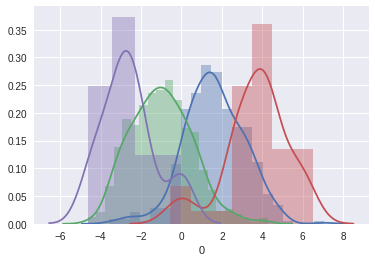

In [25]:
plot_pc_dist_by_cat_feat(0, 'ExterQual')

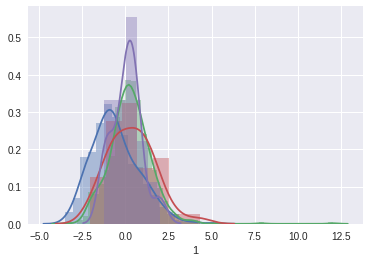

In [26]:
plot_pc_dist_by_cat_feat(1, 'ExterQual')

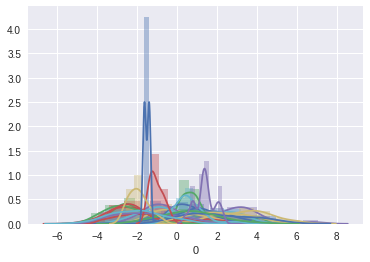

In [27]:
plot_pc_dist_by_cat_feat(0, 'Neighborhood')